## Initiate

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.lines as mlines

In [ ]:
'''
features_se
  gdp - GDP per capita, PPP (constant 2017 international $)
  ineq - Pre-tax national income share held by the p0p50 group (share)


features_id
  fc - Personal Freedom and Choice
  ls - Self-reported Life Satisfaction
  cp - Corruption Perceptions Index
  ef - Economic Freedom Index
  rl - Rule of Law
  di - Democracy Index
  pr - International Property Rights Index
  ce - Legislative Constraints on the Executive Index

epi - Enviromental Performance Index (EPI)
'''



'\nfeatures_se\n  gdp - GDP per capita, PPP (constant 2017 international $)\n  ineq - Pre-tax national income share held by the p0p50 group (share)\n  sav - Gross savings (% of GDP)\n  emp - Employed, total (% of total labor force)\n\nfeatures_id\n  fc - Personal Freedom and Choice\n  ls - Self-reported Life Satisfaction\n  cp - Corruption Perceptions Index\n  ef - Economic Freedom Index\n  rl - Rule of Law\n  di - Democracy Index\n  pr - International Property Rights Index\n  ce - Legislative Constraints on the Executive Index\n\nepi - Enviromental Performance Index (EPI)\n'

In [ ]:
features_se = ['gdp', 'ineq', 'sav', 'emp']
features_id = ['fc', 'ls', 'cp', 'ef', 'rl', 'di', 'pr', 'ce']
c_codes =['ALB', 'BIH', 'GEO', 'MDA', 'MKD', 'MNE', 'SRB', 'TUR', 'UKR', 'EU_wavg']

## Prepare Data  

In [ ]:
# import data in dataframe, transforming to ndarray
# Result - 3 dataframes: df_se, df_id, df_id

In [ ]:
df_se = pd.read_csv('dt_se.csv', names=features_se)
df_id = pd.read_csv('dt_id.csv', names=features_id)
df_epi = pd.read_csv('dt_epi.csv', names=['epi'])
df_se.index = c_codes
df_id.index = c_codes
df_epi.index = c_codes
df_se


,gdp,ineq,sav,emp
ALB,15492.07,0.184,18.4,88.4
BIH,16737.23,0.184,23.5,87.3
GEO,17078.34,0.145,19.8,88.3
MDA,13308.42,0.193,10.0,99.1
MKD,17128.76,0.194,28.9,85.6
MNE,22108.73,0.187,17.4,84.8
SRB,20885.89,0.181,20.3,91.3
TUR,33149.50,0.142,30.1,89.6
UKR,10731.44,0.177,16.8,90.2
EU_wavg,45908.04,0.196,23.9,93.7


In [ ]:
df_id

,fc,ls,cp,ef,rl,di,pr,ce
ALB,52.59,5.2773,36,66.6,0.49,6.41,4.119,0.82
BIH,60.22,5.6325,34,63.4,0.52,5.00,4.026,0.51
GEO,61.36,5.1091,56,71.8,0.60,5.20,4.671,0.77
MDA,62.80,5.8192,39,61.3,0.52,6.23,4.191,0.86
MKD,64.79,5.2536,40,65.7,0.53,6.10,4.310,0.65
MNE,63.06,5.7222,45,57.8,0.56,6.45,5.047,0.67
SRB,67.36,6.1436,36,65.2,0.49,6.33,4.575,0.48
TUR,60.61,4.6135,36,56.9,0.42,4.35,4.557,0.23
UKR,70.56,5.0714,33,54.1,0.50,5.42,3.980,0.57
EU_wavg,82.52,6.6284,66,70.4,0.73,8.01,6.490,0.88


In [ ]:
df_epi

,epi
ALB,47.1
BIH,39.4
GEO,39.1
MDA,42.7
MKD,54.3
MNE,46.9
SRB,43.9
TUR,26.3
UKR,49.6
EU_wavg,59.6


## Standartize Data

In [ ]:
# Using MinMaxScaler we get:
#   3 scaled numpy arrays - df_se_scaled, df_id_scaled, df_epi_scaled
#   corresponding 3 scaled dataframes - df_se_scaled_df, df_id_scaled_df, df_epi_scaled_df

In [ ]:
sc = MinMaxScaler()
df_se_scaled = sc.fit_transform(df_se.to_numpy())
df_se_scaled_df = pd.DataFrame(df_se_scaled, columns=features_se)
df_se_scaled_df.index = c_codes
df_se_scaled_df

,gdp,ineq,sav,emp
ALB,0.135335,0.777778,0.417910,0.251748
BIH,0.170733,0.777778,0.671642,0.174825
GEO,0.180430,0.055556,0.487562,0.244755
MDA,0.073258,0.944444,0.000000,1.000000
MKD,0.181863,0.962963,0.940299,0.055944
MNE,0.323433,0.833333,0.368159,0.000000
SRB,0.288671,0.722222,0.512438,0.454545
TUR,0.637300,0.000000,1.000000,0.335664
UKR,0.000000,0.648148,0.338308,0.377622
EU_wavg,1.000000,1.000000,0.691542,0.622378


In [ ]:
df_id_scaled = sc.fit_transform(df_id.to_numpy())
df_id_scaled_df = pd.DataFrame(df_id_scaled, columns=features_id)
df_id_scaled_df.index = c_codes
df_id_scaled_df

,fc,ls,cp,ef,rl,di,pr,ce
ALB,0.000000,0.329446,0.090909,0.706215,0.225806,0.562842,0.055378,0.907692
BIH,0.254928,0.505732,0.030303,0.525424,0.322581,0.177596,0.018327,0.430769
GEO,0.293017,0.245968,0.696970,1.000000,0.580645,0.232240,0.275299,0.830769
MDA,0.341129,0.598392,0.181818,0.406780,0.322581,0.513661,0.084064,0.969231
MKD,0.407618,0.317683,0.212121,0.655367,0.354839,0.478142,0.131474,0.646154
MNE,0.349816,0.550251,0.363636,0.209040,0.451613,0.573770,0.425100,0.676923
SRB,0.493485,0.759393,0.090909,0.627119,0.225806,0.540984,0.237052,0.384615
TUR,0.267959,0.000000,0.090909,0.158192,0.000000,0.000000,0.229880,0.000000
UKR,0.600401,0.227257,0.000000,0.000000,0.258065,0.292350,0.000000,0.523077
EU_wavg,1.000000,1.000000,1.000000,0.920904,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_epi_scaled = sc.fit_transform(df_epi.to_numpy())
df_epi_scaled_df = pd.DataFrame(df_epi_scaled, columns=['epi'])
df_epi_scaled_df.index = c_codes
df_epi_scaled_df

,epi
ALB,0.624625
BIH,0.393393
GEO,0.384384
MDA,0.492492
MKD,0.840841
MNE,0.618619
SRB,0.528529
TUR,0.000000
UKR,0.699700
EU_wavg,1.000000


# Preparing of the table

In [ ]:
df_result_scaled = pd.concat([df_se_scaled_df, df_epi_scaled_df], axis=1).loc[:, ["gdp", "ineq", "epi"]]
df_result_scaled

,gdp,ineq,epi
ALB,0.135335,0.777778,0.624625
BIH,0.170733,0.777778,0.393393
GEO,0.180430,0.055556,0.384384
MDA,0.073258,0.944444,0.492492
MKD,0.181863,0.962963,0.840841
MNE,0.323433,0.833333,0.618619
SRB,0.288671,0.722222,0.528529
TUR,0.637300,0.000000,0.000000
UKR,0.000000,0.648148,0.699700
EU_wavg,1.000000,1.000000,1.000000


## SVD

In [ ]:
# Singular value decomposition method for dimensionality reduction
# only for df_se_scaled and df_id_scaled
# result: svd_se, svd_id

In [ ]:
svd = TruncatedSVD(n_components=1)

svd_result = svd.fit_transform(df_result_scaled)
svd_result

array([[0.99209236],
       [0.86311534],
       [0.3272981 ],
       [1.01673591],
       [1.27335366],
       [1.08598936],
       [0.9391092 ],
       [0.19143189],
       [0.90104944],
       [1.64254837]])

In [ ]:
svd_id = svd.fit_transform(df_id_scaled)
svd_id

array([[1.16777537],
       [0.87236993],
       [1.52028252],
       [1.32494809],
       [1.20331843],
       [1.27690764],
       [1.22610006],
       [0.22675793],
       [0.71578992],
       [2.73002278]])

## Visualize - aggregation

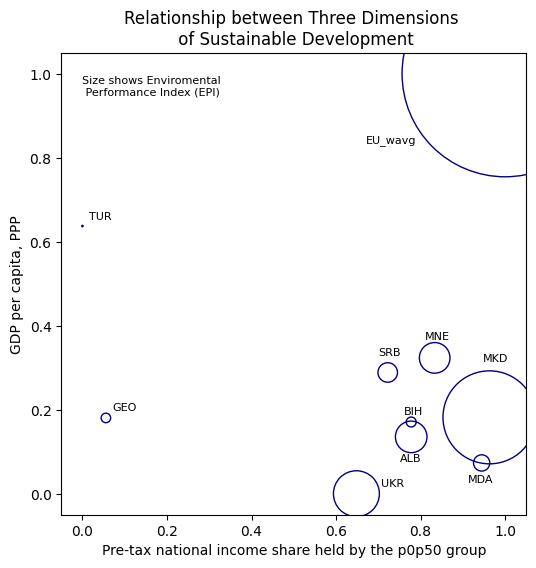

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

xytext_set =[(-8,-18),(-5,5),(5,5),(-10,-14),(-5,40),(-7,13),(-7,12),(5,5),(18,5),(-100,-50)]
#c_codes =['ALB', 'BIH', 'GEO', 'MDA', 'MKD', 'MNE', 'SRB', 'TUR', 'UKR', 'EU_wavg']

for i, txt in zip(range(0,11), c_codes):

    #plt.annotate(txt, (svd_result[i], svd_id[i]), xytext=xytext_set[i], textcoords='offset points', fontsize=8)
    #plt.scatter(df_result_scaled['ineq'][i], df_result_scaled['gdp'][i], facecolors='none', edgecolors='navy', s=np.exp(df_epi_scaled[i]*10), label=txt)

    #plt.scatter(svd_id[i], svd_result[i], c='navy', s=40)
    #plt.annotate(txt, (svd_id[i], svd_result[i]), xytext=(5,5), textcoords='offset points', fontsize=8)

    plt.scatter(df_result_scaled['ineq'][i], df_result_scaled['gdp'][i], facecolors='none', edgecolors='navy', s=np.exp(df_result_scaled['epi'][i]*10), label=txt)
    plt.annotate(txt, (df_result_scaled['ineq'][i], df_result_scaled['gdp'][i]), xytext=xytext_set[i], textcoords='offset points', fontsize=8)

ax.set_title('Relationship between Three Dimensions \n of Sustainable Development', fontsize = 12)
plt.xlabel('Pre-tax national income share held by the p0p50 group')
plt.ylabel('GDP per capita, PPP')
plt.text(0, 0.95, 'Size shows Enviromental \n Performance Index (EPI)', fontsize = 8)

#plt.savefig('fig1.png')

In [ ]:
# trendline

In [ ]:
tr_se = np.concatenate((svd_result[0:2], svd_result[3:]))
tr_id = np.concatenate((svd_id[0:2], svd_id[3:]))

lr = LinearRegression().fit(tr_id, tr_se)
lr_coef = lr.coef_.item()
lr_intercept = lr.intercept_.item()
print('coefficient of determination - ', lr.score(tr_id, tr_se))
print(lr_coef, lr_intercept)

coefficient of determination -  0.8114580803522086
0.5120604020617567 0.37820595571603943


In [ ]:
import matplotlib.patches as mpatches

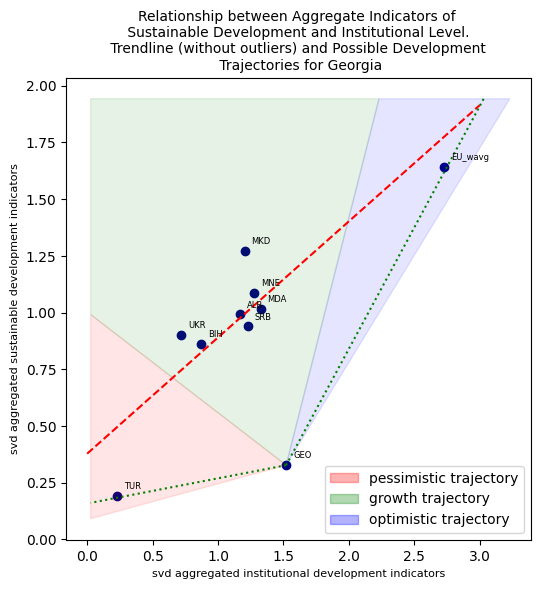

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(svd_id, svd_result, color='navy')

for i, txt in zip(range(0,11), c_codes):
  plt.annotate(txt, (svd_id[i], svd_result[i]), xytext=(5,5), textcoords='offset points', fontsize=6)

x = np.linspace(0, 3, 100)
y = lr_intercept + lr_coef * x
ax.plot(x, y, color='red', linestyle='--')

ax.set_title('Relationship between Aggregate Indicators of \n Sustainable Development and Institutional Level. \n Trendline (without outliers) and Possible Development \n Trajectories for Georgia', fontsize = 10)

ax.plot([svd_id[2], svd_id[9]+0.3], [svd_result[2], svd_result[9]+0.3], ls = ':', c="green")
ax.fill([svd_id[2], svd_id[9]-0.5, svd_id[9]+0.5, svd_id[2]], [svd_result[2], svd_result[9]+0.3, svd_result[9]+0.3, svd_result[2]], color='blue', alpha=0.1)

ax.plot([svd_id[2], svd_id[7]-0.2], [svd_result[2], svd_result[7]-0.03], ls = ':', c="green")
ax.fill([svd_id[2], svd_id[7]-0.2, svd_id[7]-0.2, svd_id[2]], [svd_result[2], svd_result[7]-0.1, svd_result[7]+0.8, svd_result[2]], color='red', alpha=0.1)

ax.fill([svd_id[2], svd_id[7]-0.2, svd_id[7]-0.2, svd_id[9]-0.5, svd_id[2]], [svd_result[2], svd_result[7]+0.8, svd_result[9]+0.3, svd_result[9]+0.3, svd_result[2]], color='green', alpha=0.1)

plt.xlabel('svd aggregated institutional development indicators', fontsize=8)
plt.ylabel('svd aggregated sustainable development indicators', fontsize=8)

p_patch = mpatches.Patch(color='red', alpha=0.3, label='pessimistic trajectory')
g_patch = mpatches.Patch(color='green', alpha=0.3, label='growth trajectory')
o_patch = mpatches.Patch(color='blue', alpha=0.3, label='optimistic trajectory')
plt.legend(handles=[p_patch, g_patch, o_patch], loc='lower right', frameon=True)

#plt.savefig('fig2.png')

#kmeans

In [ ]:
X_train = np.concatenate((svd_result,svd_id), axis=1)
X_train[0:9,:]


array([[0.99209236, 1.16777537],
       [0.86311534, 0.87236993],
       [0.3272981 , 1.52028252],
       [1.01673591, 1.32494809],
       [1.27335366, 1.20331843],
       [1.08598936, 1.27690764],
       [0.9391092 , 1.22610006],
       [0.19143189, 0.22675793],
       [0.90104944, 0.71578992]])

In [ ]:
# Choosing the best number of clusters
K = range(2, 8)
fits = []
score = []
for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train[0:9,:])
    fits.append(model)
    score.append(silhouette_score(X_train[0:9,:], model.labels_, metric='euclidean'))

pd.DataFrame(score, fits)


,0
"KMeans(n_clusters=2, n_init='auto', random_state=0)",0.543361
"KMeans(n_clusters=3, n_init='auto', random_state=0)",0.459876
"KMeans(n_clusters=4, n_init='auto', random_state=0)",0.495105
"KMeans(n_clusters=5, n_init='auto', random_state=0)",0.381383
"KMeans(n_clusters=6, n_init='auto', random_state=0)",0.329129
"KMeans(n_clusters=7, n_init='auto', random_state=0)",0.196043


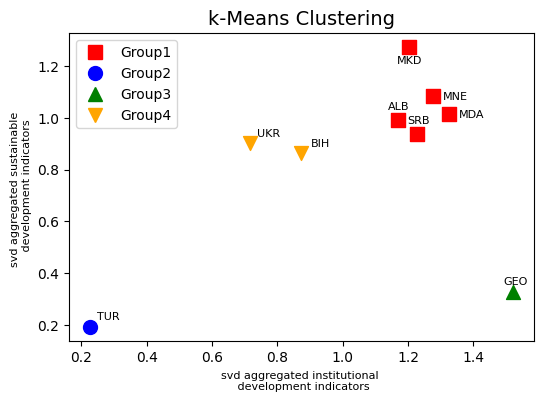

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

shapes = ['s', 'o', '^', 'v']
colors = ['red', 'blue', 'green', 'orange']
groups = ['Group1', 'Group2', 'Group3', 'Group4']
handles = []

for i, c in zip(range(0,10), c_codes[0:9]):
  plt.scatter(svd_id[i], svd_result[i], marker = shapes[fits[2].labels_[i]], c=colors[fits[2].labels_[i]], s=100)


xytext_set =[(-7,7),(7,5),(-7,5),(7,-3),(-9,-12),(7,-3),(-7,7),(5,5),(5,5)]
for i, txt in zip(range(0,9), c_codes[0:10]):
    plt.annotate(txt, (svd_id[i], svd_result[i]), xytext=xytext_set[i], textcoords='offset points', fontsize=8)

for i in range(0,4):
  handles.append(mlines.Line2D([], [], linestyle='', color=colors[i], marker=shapes[i], markersize=10, label=groups[i]))
ax.legend(handles=handles, loc='upper left')

ax.set_title('k-Means Clustering', fontsize = 14)
plt.xlabel('svd aggregated institutional \n development indicators', fontsize = 8)
plt.ylabel('svd aggregated sustainable \n development indicators', fontsize = 8)

#plt.savefig('fig4.png')

# Visualize

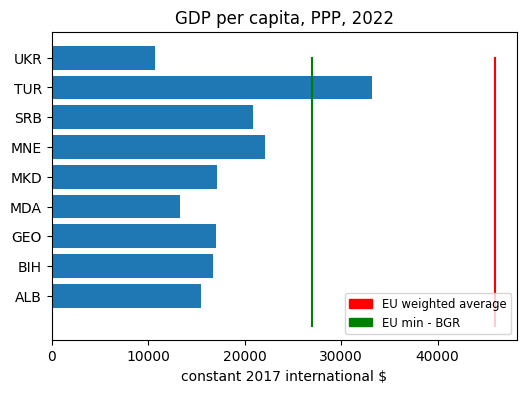

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

plt.barh(c_codes[:9], df_se['gdp'][:9])
plt.plot((45908.04,45908.04),(-1,8), c='red')
plt.plot((26961.10,26961.10),(-1,8), c='green')

ax.set_title('GDP per capita, PPP, 2022')
ax.set_xlabel('constant 2017 international $')

colors = {'EU weighted average':'red', 'EU min - BGR':'green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='lower right', fontsize='small')

#plt.savefig('fig5.png')

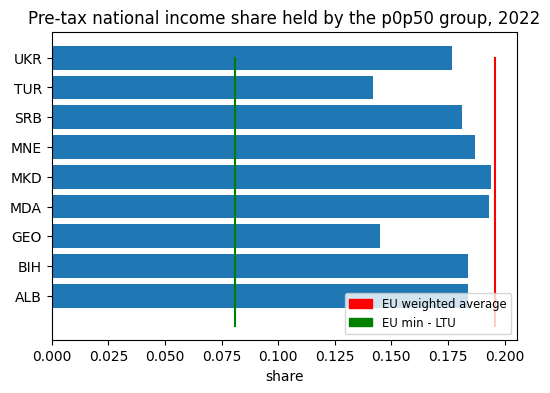

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

plt.barh(c_codes[:9], df_se['ineq'][:9])
plt.plot((0.1956,0.1956),(-1,8), c='red')
plt.plot((0.081,0.081),(-1,8), c='green')

ax.set_title('Pre-tax national income share held by the p0p50 group, 2022')
ax.set_xlabel('share')

colors = {'EU weighted average':'red', 'EU min - LTU':'green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='lower right', fontsize='small')

#plt.savefig('fig6.png')

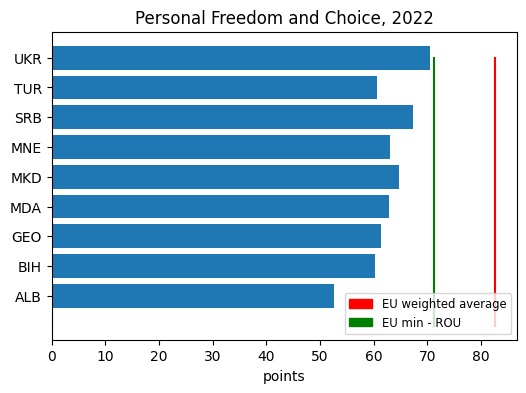

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

plt.barh(c_codes[:9], df_id['fc'][:9])
plt.plot((82.52, 82.52),(-1,8), c='red')
plt.plot((71.27, 71.27),(-1,8), c='green')

ax.set_title('Personal Freedom and Choice, 2022')
ax.set_xlabel('points')

colors = {'EU weighted average':'red', 'EU min - ROU':'green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='lower right', fontsize='small')

#plt.savefig('fig9.png')

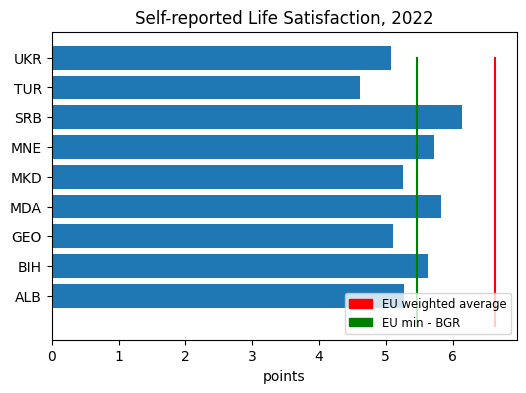

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

plt.barh(c_codes[:9], df_id['ls'][:9])
plt.plot((6.628, 6.628),(-1,8), c='red')
plt.plot((5.46, 5.46),(-1,8), c='green')

ax.set_title('Self-reported Life Satisfaction, 2022')
ax.set_xlabel('points')

colors = {'EU weighted average':'red', 'EU min - BGR':'green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='lower right', fontsize='small')

#plt.savefig('fig10.png')

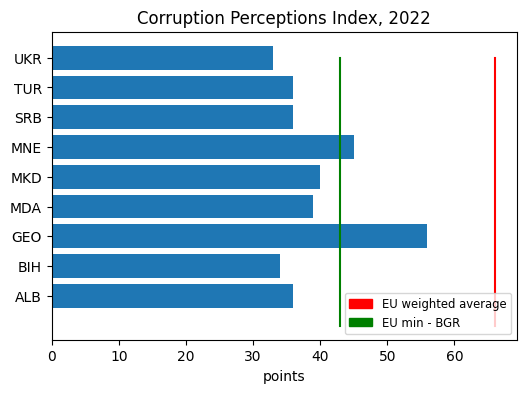

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

plt.barh(c_codes[:9], df_id['cp'][:9])
plt.plot((66, 66),(-1,8), c='red')
plt.plot((43, 43),(-1,8), c='green')

ax.set_title('Corruption Perceptions Index, 2022')
ax.set_xlabel('points')

colors = {'EU weighted average':'red', 'EU min - BGR':'green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='lower right', fontsize='small')

#plt.savefig('fig11.png')

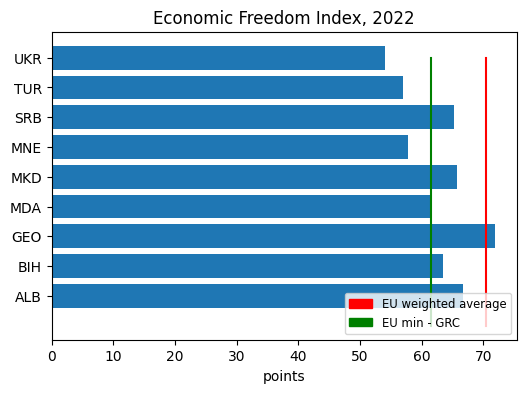

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

plt.barh(c_codes[:9], df_id['ef'][:9])
plt.plot((70.4, 70.4),(-1,8), c='red')
plt.plot((61.5, 61.5),(-1,8), c='green')

ax.set_title('Economic Freedom Index, 2022')
ax.set_xlabel('points')

colors = {'EU weighted average':'red', 'EU min - GRC':'green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='lower right', fontsize='small')

#plt.savefig('fig12.png')

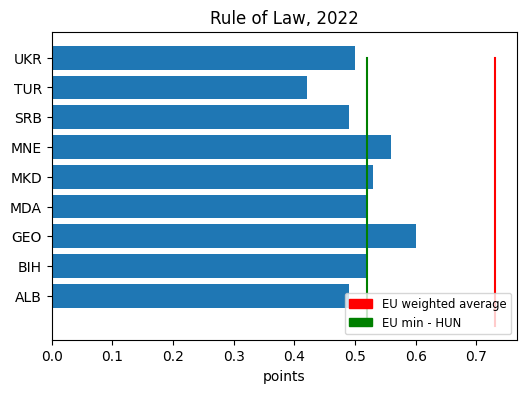

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

plt.barh(c_codes[:9], df_id['rl'][:9])
plt.plot((0.73, 0.73),(-1,8), c='red')
plt.plot((0.52, 0.52),(-1,8), c='green')

ax.set_title('Rule of Law, 2022')
ax.set_xlabel('points')

colors = {'EU weighted average':'red', 'EU min - HUN':'green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='lower right', fontsize='small')

#plt.savefig('fig13.png')

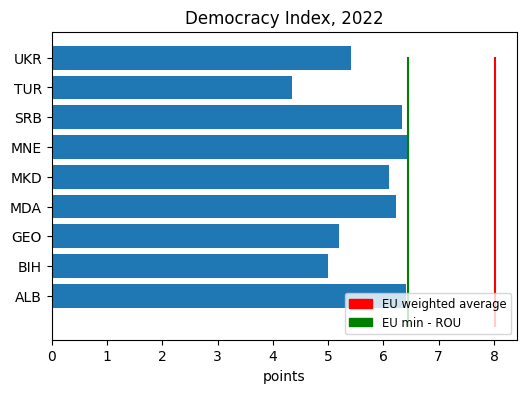

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

plt.barh(c_codes[:9], df_id['di'][:9])
plt.plot((8.01, 8.01),(-1,8), c='red')
plt.plot((6.45, 6.45),(-1,8), c='green')

ax.set_title('Democracy Index, 2022')
ax.set_xlabel('points')

colors = {'EU weighted average':'red', 'EU min - ROU':'green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='lower right', fontsize='small')

#plt.savefig('fig14.png')

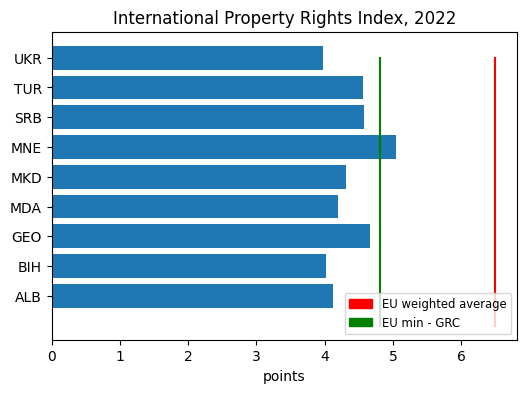

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

plt.barh(c_codes[:9], df_id['pr'][:9])
plt.plot((6.49, 6.49),(-1,8), c='red')
plt.plot((4.814, 4.814),(-1,8), c='green')

ax.set_title('International Property Rights Index, 2022')
ax.set_xlabel('points')

colors = {'EU weighted average':'red', 'EU min - GRC':'green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='lower right', fontsize='small')

#plt.savefig('fig15.png')

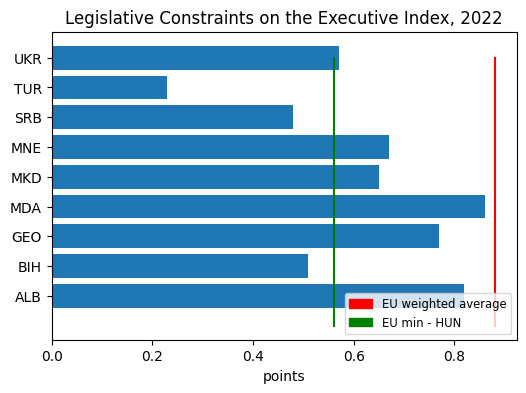

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

plt.barh(c_codes[:9], df_id['ce'][:9])
plt.plot((0.88, 0.88),(-1,8), c='red')
plt.plot((0.56, 0.56),(-1,8), c='green')

ax.set_title('Legislative Constraints on the Executive Index, 2022')
ax.set_xlabel('points')

colors = {'EU weighted average':'red', 'EU min - HUN':'green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='lower right', fontsize='small')

#plt.savefig('fig16.png')

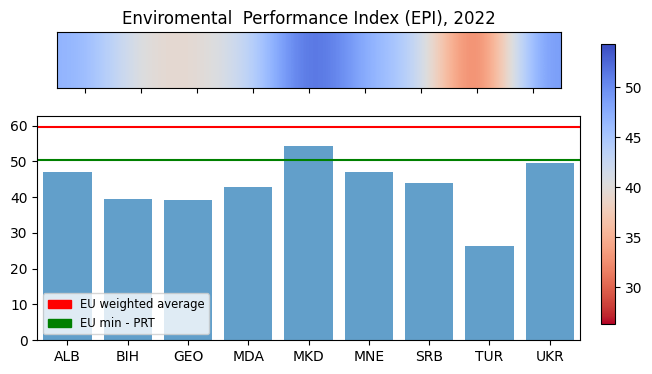

In [ ]:
from matplotlib import cm


plt.rcParams["figure.figsize"] = 7,4
fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True,  gridspec_kw = {'height_ratios':[1,4]})

x = c_codes[:9]
y = df_epi[:9].to_numpy()

hm = ax.imshow(y[np.newaxis,:], cmap=cm.coolwarm.reversed(), interpolation = 'bicubic')

fig.colorbar(hm, cax=plt.axes((0.93, 0.15, 0.02, 0.7)))
ax.set_yticks([])

ax2.bar(c_codes[:9], df_epi['epi'][:9], alpha=0.7)
ax2.plot((-0.5, 8.5),(59.6, 59.6), c='red')
ax2.plot((-0.5, 8.5),(50.4, 50.4), c='green')

ax.set_title('Enviromental  Performance Index (EPI), 2022')

colors = {'EU weighted average':'red', 'EU min - PRT':'green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax2.legend(handles, labels, loc='lower left', fontsize='small')

#plt.savefig('fig17.png')